In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
sns.set()

In [8]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

train = fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

In [12]:
train.data[6]

'From: bmdelane@quads.uchicago.edu (brian manning delaney)\nSubject: Brain Tumor Treatment (thanks)\nReply-To: bmdelane@midway.uchicago.edu\nOrganization: University of Chicago\nLines: 12\n\nThere were a few people who responded to my request for info on\ntreatment for astrocytomas through email, whom I couldn\'t thank\ndirectly because of mail-bouncing probs (Sean, Debra, and Sharon).  So\nI thought I\'d publicly thank everyone.\n\nThanks! \n\n(I\'m sure glad I accidentally hit "rn" instead of "rm" when I was\ntrying to delete a file last September. "Hmmm... \'News?\' What\'s\nthis?"....)\n\n-Brian\n'

In [15]:
train.data[6]

'From: bmdelane@quads.uchicago.edu (brian manning delaney)\nSubject: Brain Tumor Treatment (thanks)\nReply-To: bmdelane@midway.uchicago.edu\nOrganization: University of Chicago\nLines: 12\n\nThere were a few people who responded to my request for info on\ntreatment for astrocytomas through email, whom I couldn\'t thank\ndirectly because of mail-bouncing probs (Sean, Debra, and Sharon).  So\nI thought I\'d publicly thank everyone.\n\nThanks! \n\n(I\'m sure glad I accidentally hit "rn" instead of "rm" when I was\ntrying to delete a file last September. "Hmmm... \'News?\' What\'s\nthis?"....)\n\n-Brian\n'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels=model.predict(test.data)


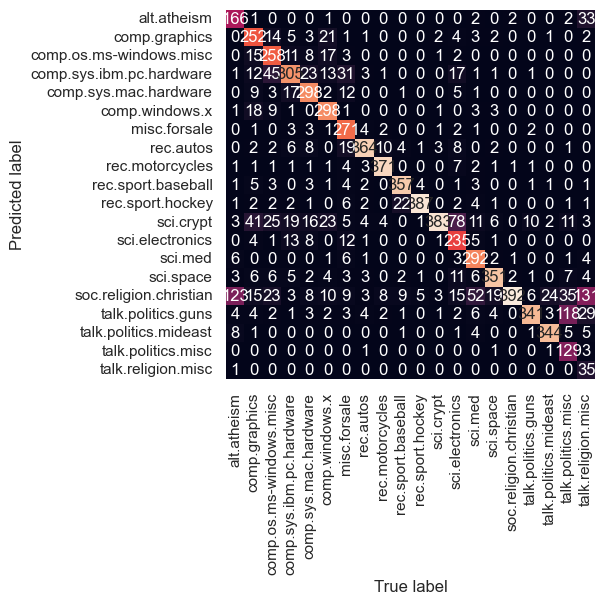

In [22]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [25]:
def prediccat(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]
prediccat('home')

'rec.sport.baseball'